# Image cropping function in action
## load data

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from spatial_tools.image.manipulate import crop_img
from spatial_tools.image.tools import read_tif

# path to "raw" dataset folder
BASE_PATH = "../../data"
dataset_name = "V1_Adult_Mouse_Brain"
dataset_folder = os.path.join(
    BASE_PATH, "20191205_10XVisium_MouseBrainCoronal_giovanni.palla"
)

In [2]:
adata = sc.read_visium(
    dataset_folder, count_file=f"{dataset_name}_filtered_feature_bc_matrix.h5"
)

xcoord = adata.obsm["spatial"][:, 0]
ycoord = adata.obsm["spatial"][:, 1]
spot_diameter = adata.uns['spatial'][dataset_name]['scalefactors']['spot_diameter_fullres']

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/hannah.spitzer/opt/miniconda3/envs/spatial-scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
img = read_tif(dataset_folder, dataset_name)

## crop image
- use different sizefactors and scalefactors
- try masking

location of the spot that we are cropping

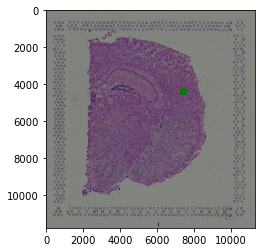

In [4]:
spot_id = 100
plt.scatter(xcoord[spot_id], ycoord[spot_id], c='green')
plt.imshow(img)

crop with different neighborhood sizes. Note that the function also works when the range is outside the image

In [ ]:
crop_1 = crop_img(img, xcoord[spot_id], ycoord[spot_id], scalef=1, sizef=1, spot_diameter=spot_diameter)
crop_2 = crop_img(img, xcoord[spot_id], ycoord[spot_id], scalef=1, sizef=2, spot_diameter=spot_diameter)
crop_10 = crop_img(img, xcoord[spot_id], ycoord[spot_id], scalef=1, sizef=10, spot_diameter=spot_diameter)
crop_100 = crop_img(img, xcoord[spot_id], ycoord[spot_id], scalef=1, sizef=100, spot_diameter=spot_diameter)

fig, axes = plt.subplots(2,2)
axes[0][0].imshow(crop_1)
axes[0][1].imshow(crop_2)
axes[1][0].imshow(crop_10)
axes[1][1].imshow(crop_100)

crop with different scales - note how the crops get smaller with smaller `scalef`

In [ ]:
crop_1 = crop_img(img, xcoord[spot_id], ycoord[spot_id], scalef=1, sizef=10, spot_diameter=spot_diameter)
crop_05 = crop_img(img, xcoord[spot_id], ycoord[spot_id], scalef=0.5, sizef=10, spot_diameter=spot_diameter)
crop_025 = crop_img(img, xcoord[spot_id], ycoord[spot_id], scalef=0.25, sizef=10, spot_diameter=spot_diameter)
crop_01 = crop_img(img, xcoord[spot_id], ycoord[spot_id], scalef=0.1, sizef=10, spot_diameter=spot_diameter)

fig, axes = plt.subplots(2,2)
axes[0][0].imshow(crop_1)
axes[0][1].imshow(crop_05)
axes[1][0].imshow(crop_025)
axes[1][1].imshow(crop_01)

mask crops with circle - different neighborhood sizes and scales

In [ ]:
crop_1 = crop_img(img, xcoord[spot_id], ycoord[spot_id], scalef=1, sizef=1, spot_diameter=spot_diameter, mask_circle=True)
crop_2 = crop_img(img, xcoord[spot_id], ycoord[spot_id], scalef=1, sizef=2, spot_diameter=spot_diameter, mask_circle=True)
crop_3 = crop_img(img, xcoord[spot_id], ycoord[spot_id], scalef=0.5, sizef=1, spot_diameter=spot_diameter, mask_circle=True)
crop_4 = crop_img(img, xcoord[spot_id], ycoord[spot_id], scalef=0.25, sizef=1, spot_diameter=spot_diameter, mask_circle=True)

fig, axes = plt.subplots(2,2)
axes[0][0].imshow(crop_1)
axes[0][1].imshow(crop_2)
axes[1][0].imshow(crop_3)
axes[1][1].imshow(crop_4)

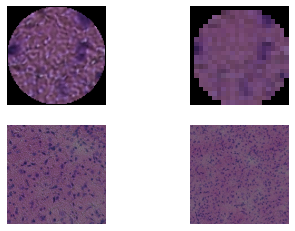

In [6]:
crop_1 = crop_img(img, xcoord[spot_id], ycoord[spot_id], scalef=1, sizef=1, spot_diameter=spot_diameter, mask_circle=True)
crop_2 = crop_img(img, xcoord[spot_id], ycoord[spot_id], scalef=0.25, sizef=1, spot_diameter=spot_diameter, mask_circle=True)
crop_3 = crop_img(img, xcoord[spot_id], ycoord[spot_id], scalef=1, sizef=5, spot_diameter=spot_diameter)
crop_4 = crop_img(img, xcoord[spot_id], ycoord[spot_id], scalef=1, sizef=10, spot_diameter=spot_diameter)

fig, axes = plt.subplots(2,2)
axes[0][0].imshow(crop_1)
axes[0][1].imshow(crop_2)
axes[1][0].imshow(crop_3)
axes[1][1].imshow(crop_4)
for ax in axes.flat:
    ax.axis('off')
plt.savefig('crop_example.png')